Credit Card Fraud Detection using different ML Models


In [ ]:
#@title 
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#title Default title text
transactions = pd.read_csv("creditcard.csv")
transactions.shape

(37722, 31)

In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    37722 non-null  int64  
 1   V1      37722 non-null  float64
 2   V2      37722 non-null  float64
 3   V3      37722 non-null  float64
 4   V4      37722 non-null  float64
 5   V5      37722 non-null  float64
 6   V6      37722 non-null  float64
 7   V7      37721 non-null  float64
 8   V8      37721 non-null  float64
 9   V9      37721 non-null  float64
 10  V10     37721 non-null  float64
 11  V11     37721 non-null  float64
 12  V12     37721 non-null  float64
 13  V13     37721 non-null  float64
 14  V14     37721 non-null  float64
 15  V15     37721 non-null  float64
 16  V16     37721 non-null  float64
 17  V17     37721 non-null  float64
 18  V18     37721 non-null  float64
 19  V19     37721 non-null  float64
 20  V20     37721 non-null  float64
 21  V21     37721 non-null  float64
 22

In [ ]:
#any missing data in CSV file.
transactions.isnull().any().any()

True

In [ ]:
transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
#Display the frequency of fraudulent transactions.
#1 stands for fradulent and 0 for true.
transactions['Class'].value_counts()
transactions['Class'].value_counts(normalize = True)

0.0    0.997269
1.0    0.002731
Name: Class, dtype: float64

In [ ]:
#Divide the dataset into training and testing sets.
X= transactions.drop(labels='Class',axis = 1) #Features
y=transactions.loc[:,'Class']

In [ ]:
from sklearn.model_selection import train_test_split

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
X_train , X_test, y_train, y_test = train_test_split(X , y , test_size=0.2 )

In [ ]:
X_train.shape,X_test.shape

((30177, 30), (7545, 30))

In [ ]:
#to flag off warnings
X_train.is_copy = False
X_test.is_copy = False

In [ ]:
X_train['Time'].describe()

count    30177.000000
mean     24752.981178
std      12527.985972
min          0.000000
25%      13916.000000
50%      29841.000000
75%      34909.000000
max      39077.000000
Name: Time, dtype: float64

In [ ]:
#convert seconds to hours for easy of calculations

X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# time of last transaction in days
X_train['Time'].max() / 24

0.45228009259259255

Text(0.5, 1.0, 'Transaction times')

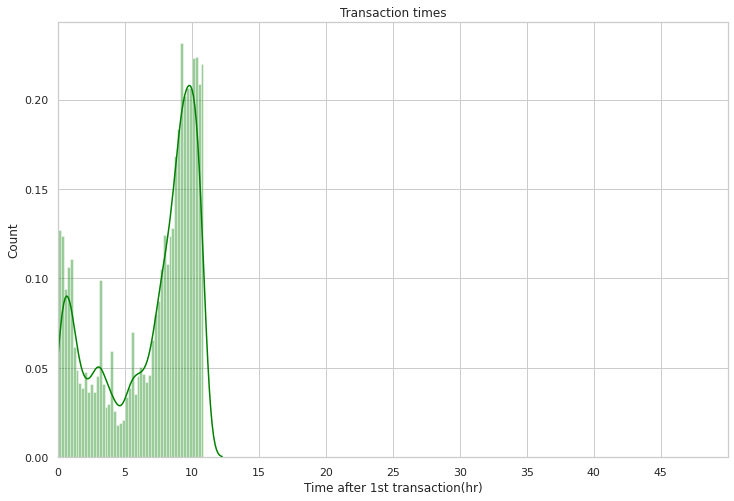

In [ ]:
#histogram of transition times. 
plt.figure(figsize=(12,8))
sns.distplot(X_train['Time'],bins=50,color='green')
plt.xlim([0,50])
plt.xticks(np.arange(0,50,5))
plt.xlabel('Time after 1st transaction(hr)')
plt.ylabel('Count')
plt.title('Transaction times')

In [ ]:
#Summary stats
X_train['Amount'].describe()

count    30176.000000
mean        86.346774
std        234.814927
min          0.000000
25%          7.020000
50%         22.720000
75%         77.000000
max       7879.420000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

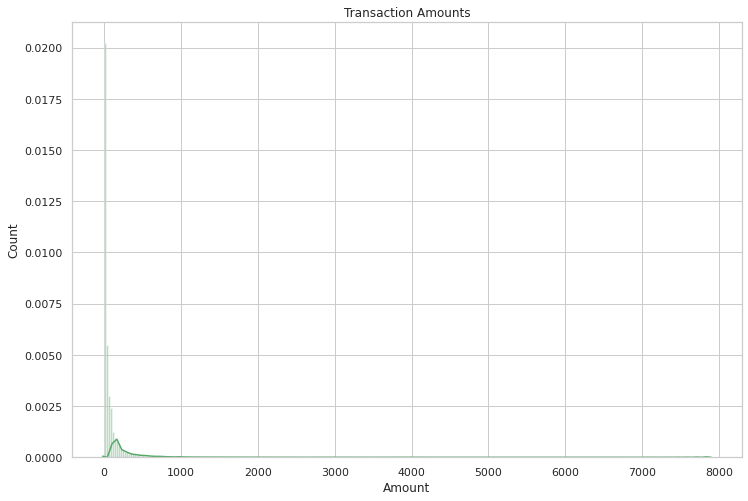

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],bins=300,color='g')
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

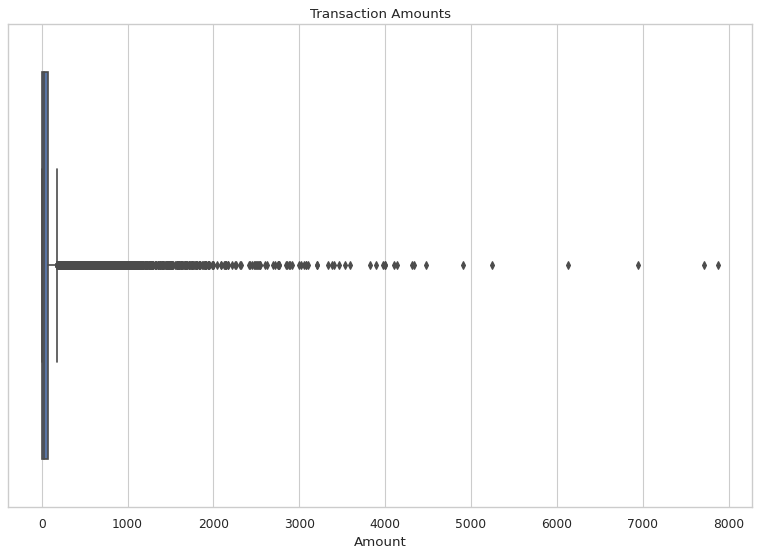

In [ ]:
# box plot as the histogram doesnot shoe the details properly.
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [ ]:
#There are no outliers in the left and right side. Thus the amounts were roght skewed. We can check for the skewness to be sure.
X_train['Amount'].skew()

10.579275630101533

In [ ]:
#Lets remove the skewness and convert the data into a normal distribution.
X_train.loc[:,'Amount'] = X_train['Amount']+ 1e-9
# Shift all amounts by 1e-9

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
#Performing Box-Cox Transform
from scipy import stats
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], alpha=0.01)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1044: RuntimeWarning: invalid value encountered in less_equal
  if any(x <= 0):
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [ ]:
#The maximum likelihood estimate of  λ  in the Box-Cox transform:
X_train.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
22150,8.906667,-0.008188,1.117178,0.613191,1.328874,0.822263,-0.514532,0.659401,-0.153569,-0.708958,-0.442096,1.543930,-0.213506,-0.445685,-1.675142,0.844876,0.569295,0.958228,1.692684,0.696467,0.170265,0.033305,0.273073,-0.279479,-0.156676,-0.063629,-0.227161,-0.070468,-0.155958,1.000000e-09
15850,7.581111,-0.951807,0.916797,1.257451,-1.582607,0.250870,-0.424307,0.840887,-0.264923,0.653181,0.778953,1.529548,0.060569,-1.171309,-0.177322,0.153704,0.209895,-0.790681,-0.380628,-0.817584,0.277184,-0.136304,0.004215,-0.059275,0.032935,-0.314802,0.709529,-0.192677,-0.260456,-1.051414e-01
7676,2.956389,-2.372834,-0.612308,3.224686,3.758968,-0.483226,1.615778,-1.719115,1.101559,1.853864,0.467220,0.978996,-2.285457,0.157705,0.731574,-2.025575,-0.624413,1.654810,0.788221,0.983593,0.350868,-0.021965,0.630479,-0.499405,0.021481,0.060255,0.499542,0.329417,-0.259837,1.672668e+14
5819,1.745833,-0.009864,-1.857852,0.675316,1.979426,-1.513061,-0.028978,0.141403,-0.163109,2.031836,-0.784263,0.214690,-2.263129,1.585303,1.366030,-0.011019,0.305295,0.358815,0.639206,-0.828640,1.055334,0.342287,0.009599,-0.615768,0.379125,0.256018,-0.361702,-0.074888,0.135587,5.233251e+22
17484,7.988889,-2.184207,0.975153,0.785831,-0.634514,-0.454746,-0.093019,0.460788,0.195005,1.041183,0.487619,-1.582818,-0.262672,-0.030099,-0.551963,0.036893,0.566484,-0.782063,0.186272,-0.457555,0.117216,-0.081470,0.360072,-0.478613,-0.388739,0.190385,0.463784,0.163767,0.125424,8.377691e+15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11368,5.507778,-0.693441,0.362902,2.651711,-1.749294,-0.288551,-0.201163,0.310430,-0.067021,2.665408,-2.065905,0.485218,-2.469523,0.732424,1.091388,0.296444,-0.656595,0.577169,0.161563,-0.513882,-0.145333,-0.139206,0.151427,-0.333633,0.007430,0.367123,-0.810258,-0.071310,-0.157226,1.474670e+08
23846,9.152778,1.273745,0.278094,-0.075297,0.446751,0.215297,-0.125249,-0.017577,-0.004897,0.103271,-0.321924,-0.615061,-0.016210,0.241839,-0.287598,1.419394,0.436130,-0.025899,-0.460613,-0.239227,-0.094043,-0.316963,-0.878888,0.057085,-0.810224,0.251885,0.176653,-0.008267,0.018517,-9.634343e-03
33056,10.297778,1.441339,-0.344212,-0.152643,-1.564018,-0.760706,-1.496772,0.019564,-0.482343,-0.336897,-0.147782,-0.132884,1.064876,1.650776,0.098470,1.121457,-2.357300,0.063921,0.996734,-0.150974,-0.446051,-0.360886,-0.358103,-0.071963,0.411756,0.780308,-0.634600,0.064483,0.022217,4.005466e+01
29109,9.812778,1.332906,-0.843774,1.113725,-0.544235,-1.508369,-0.054470,-1.306440,0.204304,0.047244,0.496808,-0.505222,-0.894504,-0.748609,-0.495897,0.715365,0.935144,0.645239,-1.358668,0.110764,-0.040124,0.317958,1.003963,-0.053029,0.112019,0.355148,-0.012805,0.061967,0.018442,-1.180340e-01


Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

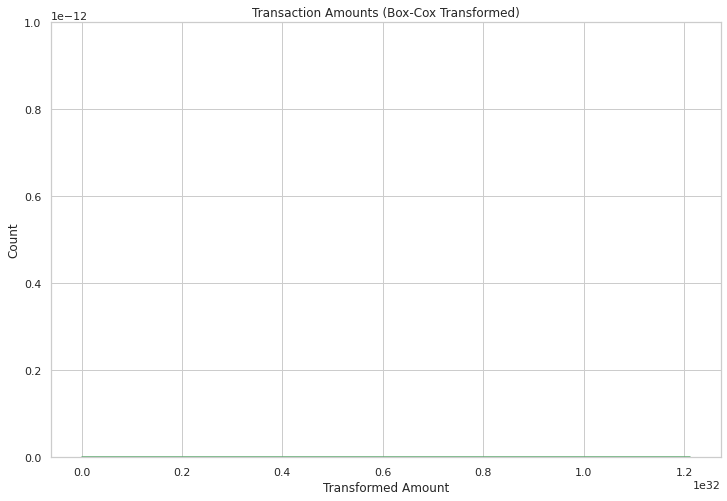

In [ ]:
#plotting newly transformed accounts
plt.figure(figsize=(12,8))
sns.distplot(X_train['Amount'],color='g')
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [ ]:
X_train['Amount'].describe()

count    3.017600e+04
mean     9.655897e+27
std      9.442874e+29
min     -1.180340e-01
25%      1.746988e+06
50%      3.661699e+10
75%      1.133999e+15
max      1.212371e+32
Name: Amount, dtype: float64

In [ ]:
X_train['Amount'].skew()

113.8191382176832

In [ ]:
#So our power transform removed most of the skewness in the Amount variable. Now we need to compute the Box-Cox transform on the test data amounts as well, using the  λ  value estimated on the training data.

In [ ]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-9 # Shift all amounts by 1e-9
X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


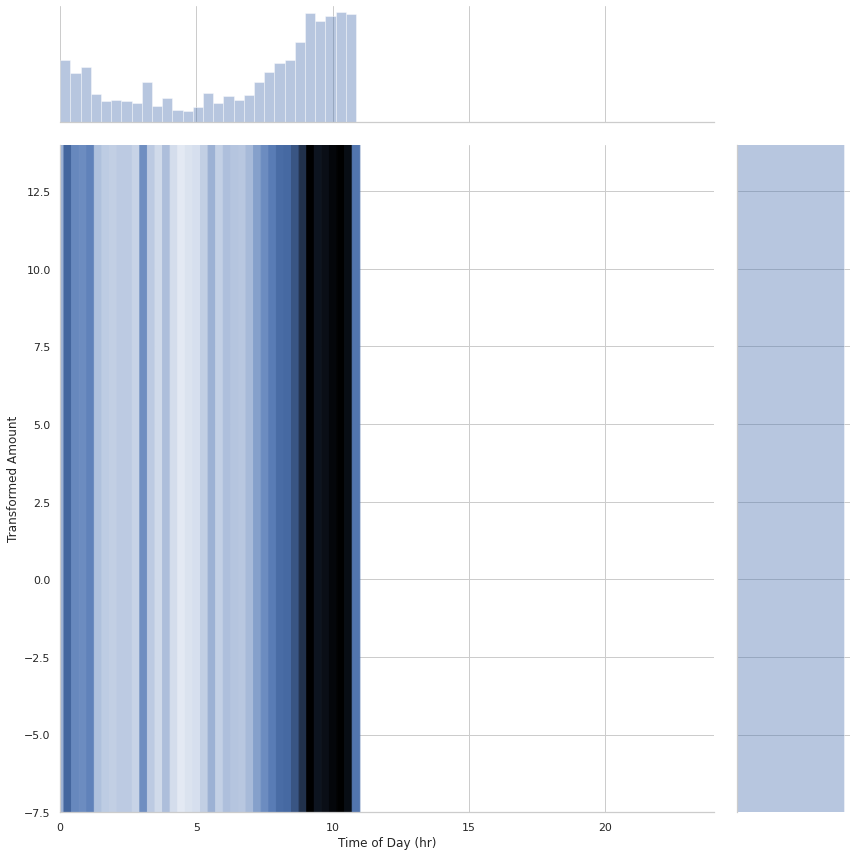

In [ ]:
#Time vs Amount
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', stat_func=None, size=12, xlim=(0,24), ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')

In [ ]:
#Let's compare the descriptive stats of the PCA variables V1-V28.
pca_vars = ['V%i' % k for k in range(1,29)]

In [ ]:
#Full Table descriptive stats

In [ ]:
X_train[pca_vars].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,30177.000000,30177.000000,30177.000000,30177.000000,30177.000000,30177.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000,30176.000000
mean,-0.210587,0.065615,0.711393,0.197848,-0.224983,0.095436,-0.112634,0.037474,0.228722,-0.078080,0.437167,-0.496658,0.268466,0.248756,0.093220,-0.006855,0.156285,-0.090342,-0.035945,0.047427,-0.028684,-0.114720,-0.041482,0.004449,0.133547,0.019889,0.009372,0.004612
std,1.836886,1.547729,1.545731,1.405509,1.376862,1.302255,1.263836,1.248944,1.228084,1.134023,1.133392,1.400581,1.152212,1.157260,0.957368,0.933914,1.063965,0.860813,0.818877,0.679558,0.777981,0.642964,0.566075,0.595274,0.436888,0.504402,0.379781,0.293854
min,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-17.574835,-21.922811,-41.484823,-7.175097,-14.166795,-2.985309,-17.631606,-3.808724,-18.822087,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-11.748689,-20.262054,-8.593642,-26.751119,-2.761047,-7.495741,-1.338556,-8.260909,-8.478686
25%,-0.966715,-0.509740,0.240415,-0.708781,-0.826562,-0.640690,-0.594982,-0.154100,-0.547046,-0.556761,-0.380287,-1.417087,-0.514023,-0.257251,-0.463442,-0.493857,-0.341082,-0.565750,-0.526532,-0.164573,-0.238193,-0.537994,-0.177529,-0.329853,-0.130524,-0.331552,-0.063160,-0.007306
50%,-0.233897,0.110830,0.820204,0.196379,-0.262848,-0.157669,-0.071364,0.045914,0.106080,-0.134393,0.408701,-0.139019,0.189131,0.209982,0.210823,0.061428,0.096741,-0.074771,-0.034615,-0.023653,-0.079680,-0.088472,-0.051045,0.059450,0.175049,-0.066298,0.008831,0.021269
75%,1.160755,0.753694,1.448847,1.076415,0.302177,0.483348,0.437779,0.310593,0.952948,0.373976,1.219825,0.479832,1.017150,0.856063,0.771756,0.552458,0.588326,0.404220,0.472617,0.167094,0.097274,0.296157,0.076788,0.398972,0.419316,0.298105,0.086082,0.076068
max,1.685314,16.713389,4.079168,13.143668,24.363532,21.393069,34.303177,20.007208,10.392889,12.701539,11.669205,4.846452,3.904562,7.692209,3.832930,4.816252,9.253526,4.295648,3.623332,17.281859,22.614889,5.805795,17.297845,4.014444,2.732898,3.517346,6.211230,5.678671


Text(0.5, 1.0, 'V1-V28 Means')

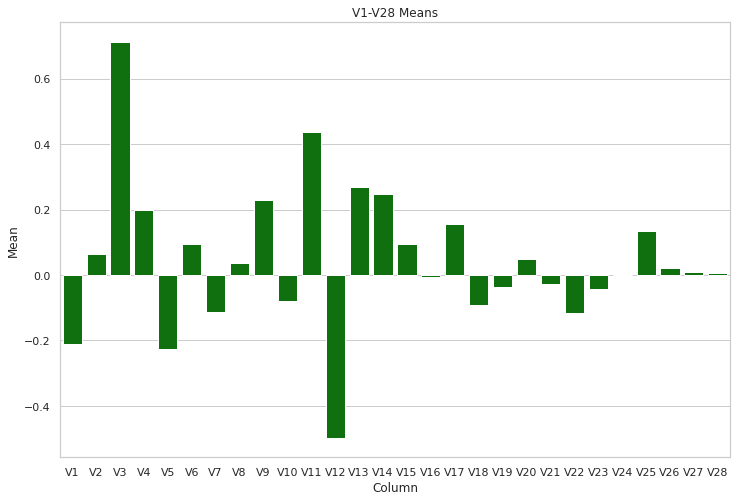

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [ ]:
#All of V1-V28 have approximately zero mean. Now plot the standard deviations:

Text(0.5, 1.0, 'V1-V28 Means')

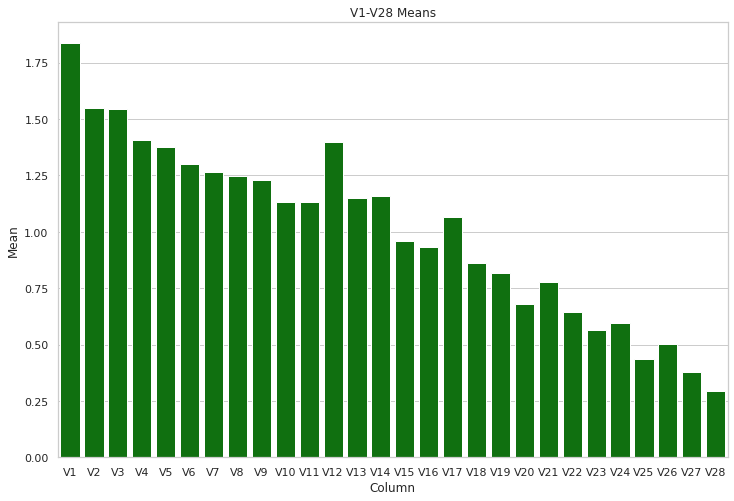

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Means')

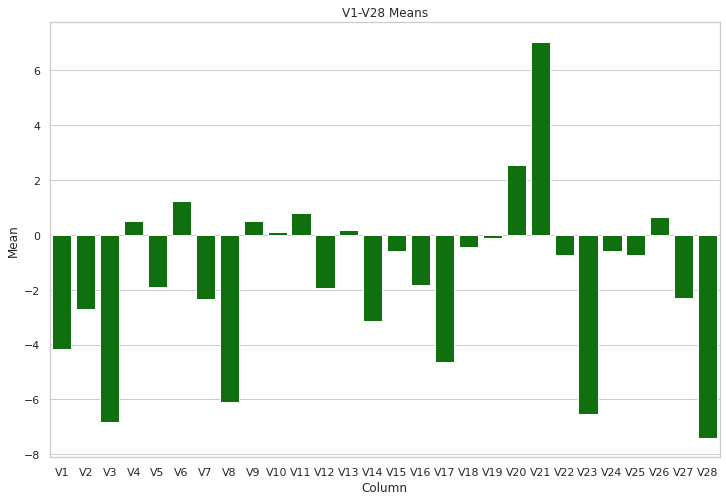

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

In [ ]:
#The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9. Plot the skewnesses next:

In [ ]:
#A few of the PCA variables are significantly skewed. Let's plot a histogram of one of the particularly skewed variables, V8, to see the distribution in detail.

Text(0.5, 1.0, 'V8')

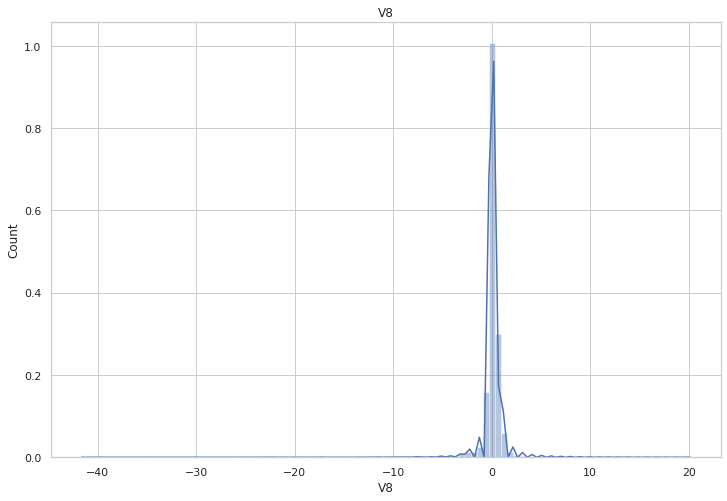

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(X_train['V8'], bins=100)
plt.ylabel('Count')
plt.title('V8')

In [ ]:
#boxplot:

Text(0.5, 1.0, 'V8')

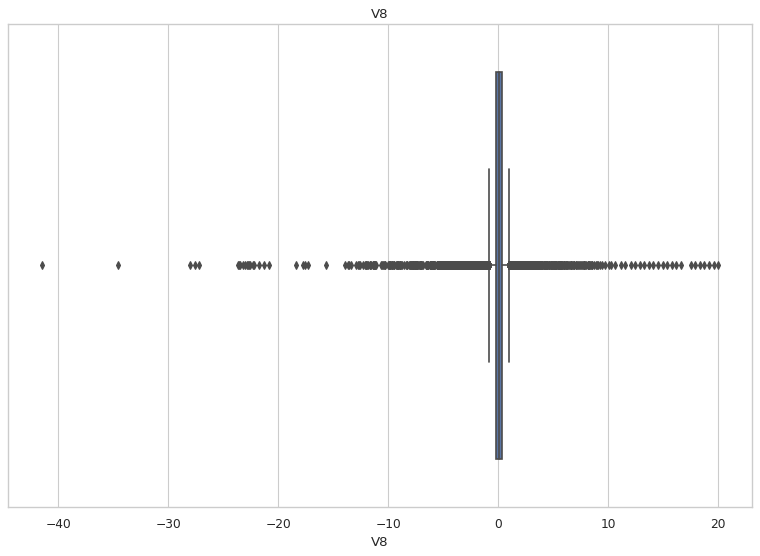

In [ ]:
plt.figure(figsize=(12,8), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')

In [ ]:
#The kurtosis method

Text(0.5, 1.0, 'V1-V28 Kurtoses')

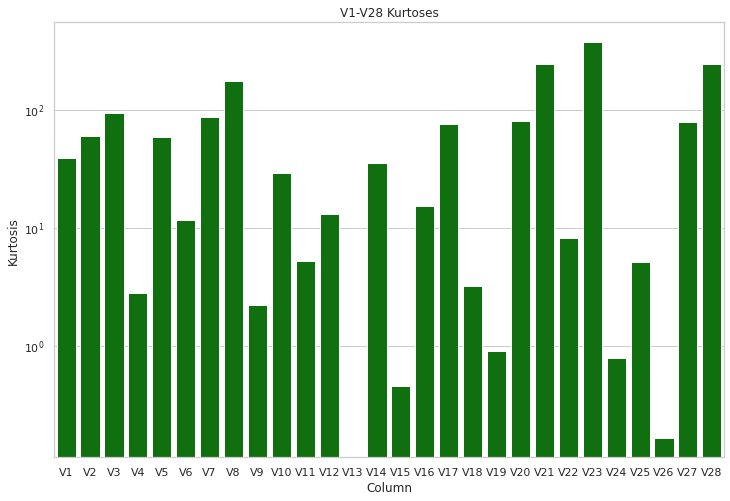

In [ ]:
plt.figure(figsize=(12,8))
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='green')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

In [ ]:
#plot the medians:

Text(0.5, 1.0, 'V1-V28 Means')

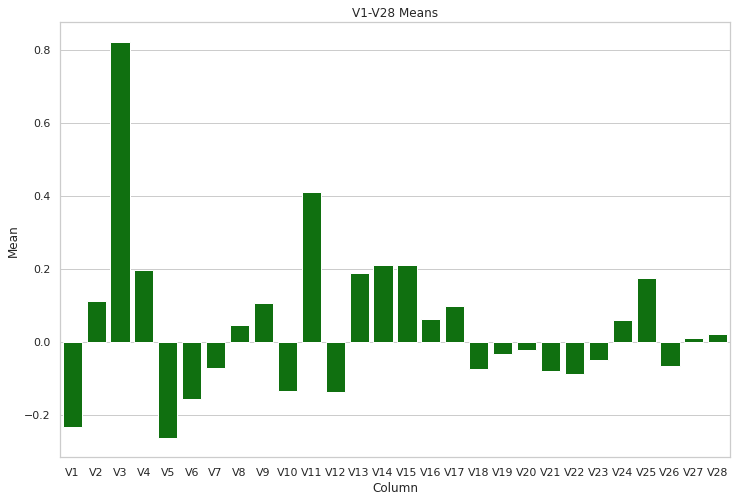

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='green')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')


In [ ]:
 #the interquartile ranges (IQR)*:

Text(0.5, 1.0, 'V1-V28 IQRs')

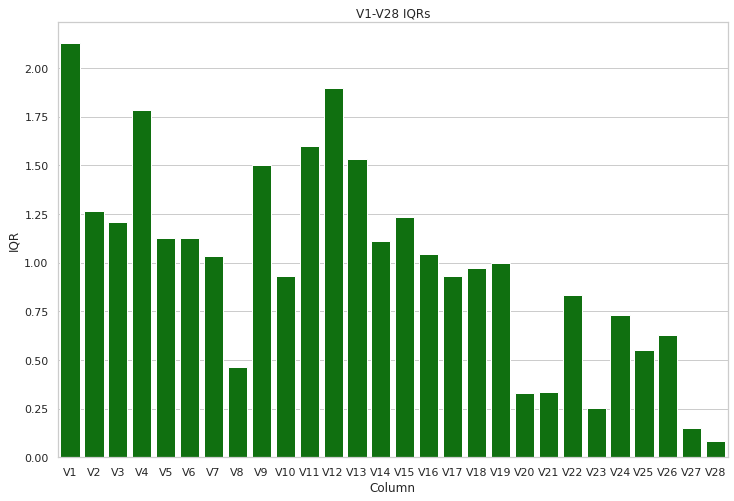

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='green')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [ ]:
#Logistic Regression


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])

In [ ]:
#one grid for the linear SVC and one for logistic regression:

In [ ]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

In [ ]:
MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=False)

In [ ]:
#Perform the grid search:

In [ ]:
grid_rf.fit(X_train, y_train)

NameError: ignored

In [ ]:
!pip install -U scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

     |████████████████████████████████| 6.9MB 7.9MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


/usr/local/lib/python3.6/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.6/dist-packages/scikit_learn-0.23.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
pipeline_rf = Pipeline([
    ('model', RandomForestClassifier(n_jobs=-1, random_state=1))
])

In [ ]:
param_grid_rf = {'model__n_estimators': [75]}

In [ ]:
grid_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', cv=5, verbose=1, return_train_score=True)

In [ ]:
#Test Set Evaluation of the Best Model
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [ ]:
def classification_eval(estimator,X_test,y_test):
    y_pred=estimator.predict(X_test)
    dec = np.int64(np.ceil(np.log10(len(y_test))))
    
    print("Confusion Matrix")
    print(confusion_matrix(y_test,y_pred),'\n')
    
    print('Classification report')
    print(classification_report(y_test, y_pred, digits=dec))
    
    print("Scalar Metrics")
    format_str = '%%13s = %%.%if' % dec
    print(format_str % ('MCC', matthews_corrcoef(y_test, y_pred)))
    
    if y_test.nunique() <= 2: # Additional metrics for binary classification
        try:
            y_score = estimator.predict_proba(X_test)[:,1]
        except:
            y_score = estimator.decision_function(X_test)
        print(format_str % ('AUPRC', average_precision_score(y_test, y_score)))
        print(format_str % ('AUROC', roc_auc_score(y_test, y_score)))
    print(format_str % ("Cohen's kappa", cohen_kappa_score(y_test, y_pred)))
    print(format_str % ('Accuracy', accuracy_score(y_test, y_pred)))

In [ ]:
#pycaret library.

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
clf=setup(transactions,target="Class")

NameError: ignored

In [ ]:
!pip install -U scikit-learn scipy statsmodels

  Using cached https://files.pythonhosted.org/packages/d9/3a/eb8d7bbe28f4787d140bb9df685b7d5bf6115c0e2a969def4027144e98b6/scikit_learn-0.23.1-cp36-cp36m-manylinux1_x86_64.whl
     |████████████████████████████████| 25.9MB 1.3MB/s 
     |████████████████████████████████| 8.7MB 55.3MB/s 
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.5.0 which is incompatible.
ERROR: pycaret 1.0.0 has requirement scikit-learn==0.22, but you'll have scikit-learn 0.23.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Success

In [ ]:
from scipy.special import logsumexp

In [ ]:
et=create_model("et")

IntProgress(value=0, description='Processing: ', max=14)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:52:32
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Accuracy,AUC,Recall,Prec.,F1,Kappa


NameError: ignored

In [ ]:
print(et)

ExtraTreesClassifier(random_state=1667)


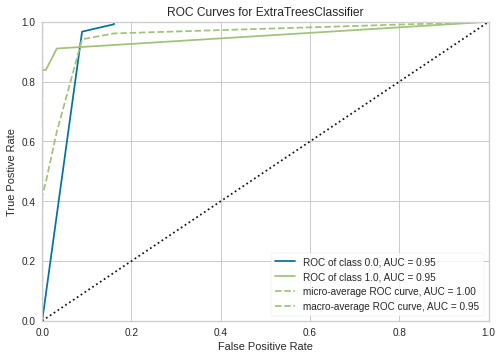

In [ ]:
#ROC Curve:
plot_model(et)

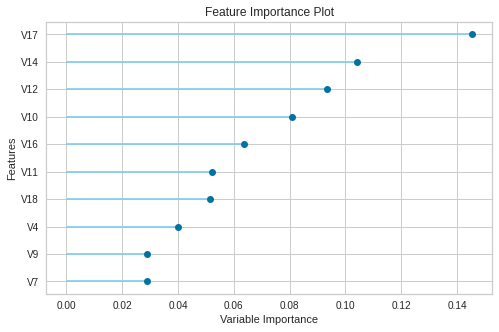

In [ ]:
plot_model(et, plot='feature')

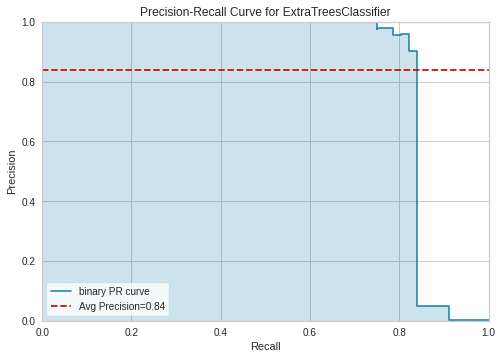

In [ ]:
#Precision Curve
plot_model(et, plot = 'pr')

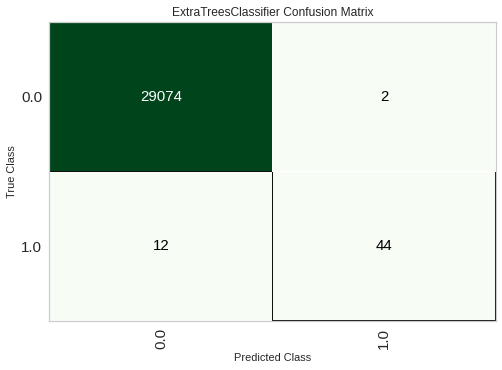

In [ ]:
#Confusion Matrix
plot_model(et, plot = 'confusion_matrix')

In [ ]:
#Model Evaluation:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
#Prediction:
predict_model(et); #Accuracy: 99%

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.9995,0.9524,0.7857,0.9565,0.8627,0.8625


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.999500,0.971400,0.791000,0.923100,0.847800,0.847500
1,CatBoost Classifier,0.999500,0.967000,0.760300,0.962100,0.847200,0.846900
2,Random Forest Classifier,0.999400,0.925900,0.698100,0.952700,0.801200,0.800900
3,Extra Trees Classifier,0.999400,0.948200,0.767900,0.928200,0.837300,0.837000
4,Ada Boost Classifier,0.999300,0.955700,0.751900,0.869500,0.801400,0.801100
5,Linear Discriminant Analysis,0.999200,0.975400,0.767900,0.823500,0.787700,0.787400
6,Decision Tree Classifier,0.999100,0.874800,0.750000,0.778600,0.754400,0.753900
7,Gradient Boosting Classifier,0.999000,0.777200,0.645500,0.836500,0.686700,0.686300
8,Logistic Regression,0.998600,0.901100,0.478200,0.674100,0.548900,0.548200
9,Ridge Classifier,0.998600,0.000000,0.410300,0.721900,0.514000,0.513300


In [ ]:
#find the number of fraud and valid transactions dataset.

fraud = transactions[transactions['Class']==1]
normal = transactions[transactions['Class']==0]
print(f"Shape of Fraudulant transactions: {fraud.shape}")
print(f"Shape of Non-Fraudulant transactions: {normal.shape}")

Shape of Fraudulant transactions: (264, 31)
Shape of Non-Fraudulant transactions: (138458, 31)


In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,264.000000,138458.000000
mean,115.387008,91.326355
std,245.189867,247.818289
min,0.000000,0.000000
25%,1.000000,6.040000
50%,9.560000,23.990000
75%,99.990000,81.000000
max,1809.680000,19656.530000


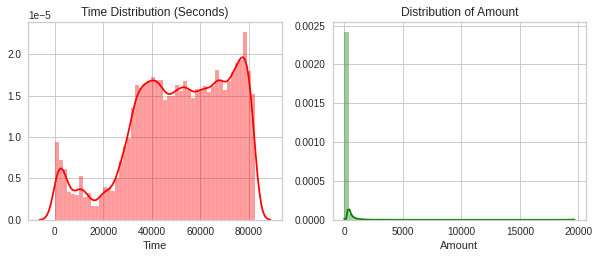

In [ ]:
plt.figure(figsize=(10,8))

plt.subplot(2, 2, 1)
plt.title('Time Distribution (Seconds)')

sns.distplot(transactions['Time'], color='red');


plt.subplot(2, 2, 2)
plt.title('Distribution of Amount')
sns.distplot(transactions['Amount'],color='green');

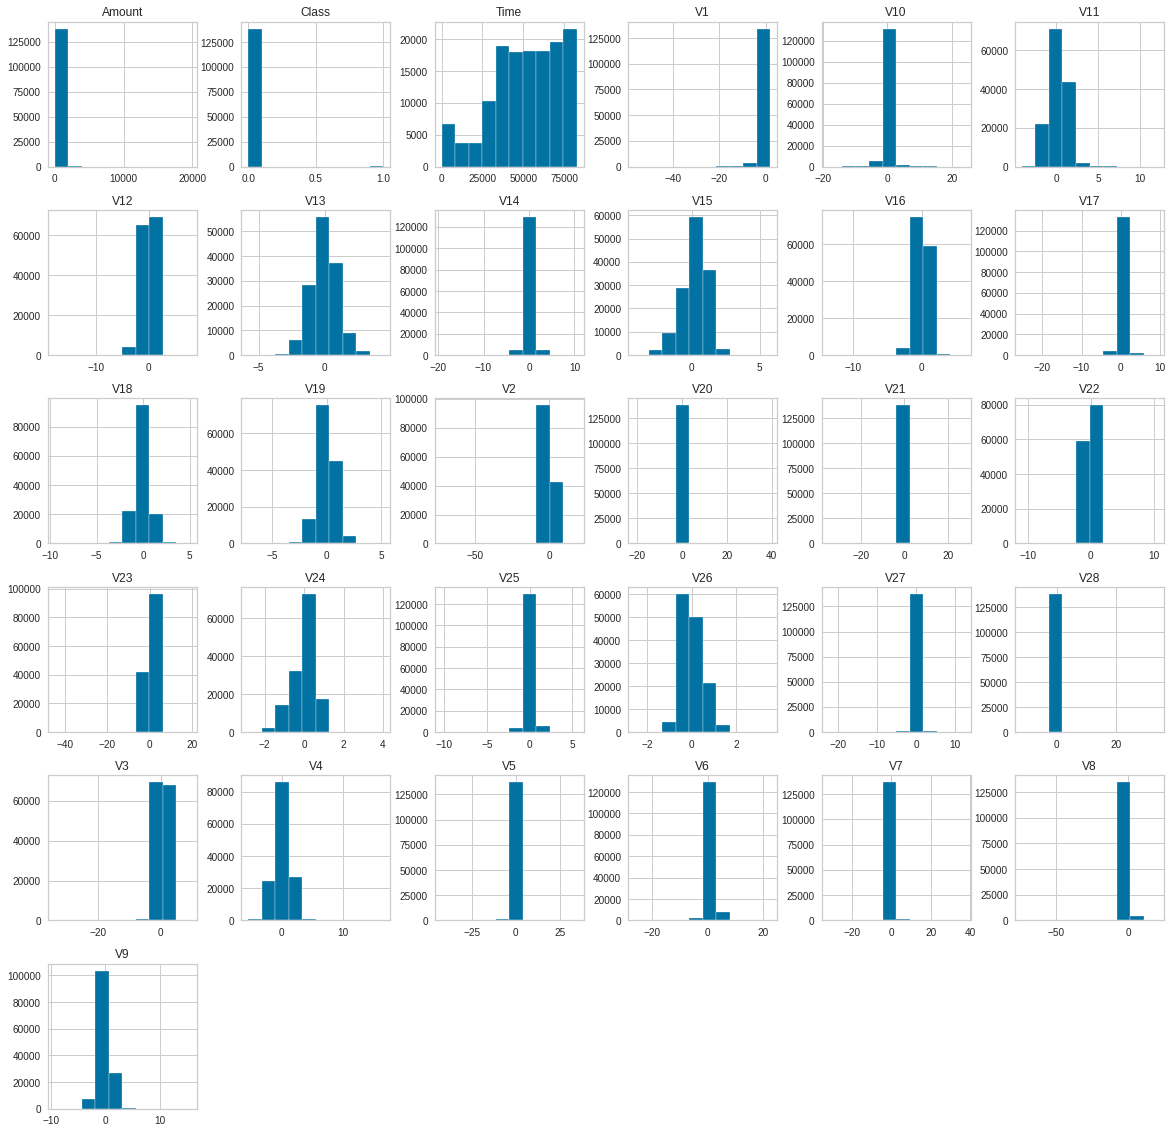

In [ ]:
#out modelling and prediction
transactions.hist(figsize=(20, 20));

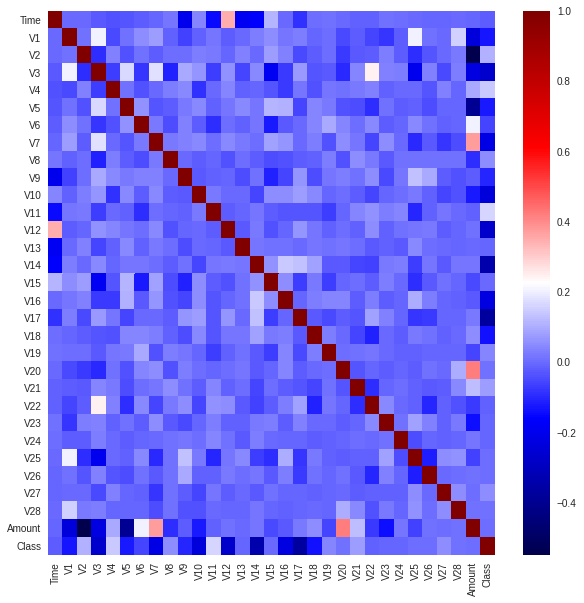

In [ ]:
# heatmap for high correlations
plt.figure(figsize=(10,10))
sns.heatmap(data=transactions.corr(), cmap="seismic")
plt.show();

In [ ]:
#Highest correlations come from:
#Time & V3 (-0.42)
#Amount & V2 (-0.53)
#Amount & V4 (0.4)